In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
# check gpu
print(tf.config.list_physical_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


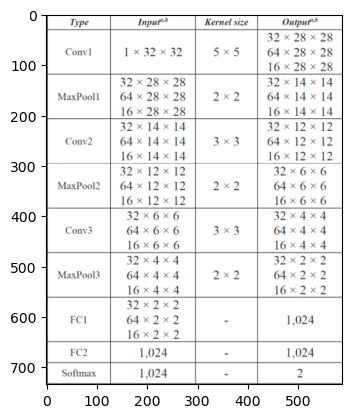

In [3]:
# https://ieeexplore.ieee.org/abstract/document/7440527
# we have changed our model
img = mpimg.imread('possible_model.png')
plt.imshow(img)
plt.show()

In [7]:
input_shape = (225, 225, 1)

model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.InputLayer(input_shape=input_shape),
    # convolution 1:
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # max pooling layer 1:
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # convolution 2:
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # max pooling layer 2:
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # convolution 3:
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    # max pooling layer 3:
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # dense layer:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=3, activation='softmax')
])


In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 32)       0

In [9]:
training_array_RAW = np.load('training_array_RAW.npy')
training_labels_array = np.load('training_labels_array.npy')
validation_array_RAW = np.load('validation_array_RAW.npy')
validation_labels_array = np.load('validation_labels_array.npy')

(3180, 225, 225)


In [10]:
hist = model.fit(training_array_RAW, training_labels_array,
              epochs=30,
              batch_size=32,
              validation_data=(validation_array_RAW, validation_labels_array))

Epoch 1/30
100/100 [==============================] - 14s 73ms/step - loss: 0.2834 - accuracy: 0.9406 - val_loss: 0.6861 - val_accuracy: 0.8059
Epoch 2/30
100/100 [==============================] - 6s 60ms/step - loss: 0.2519 - accuracy: 0.9406 - val_loss: 0.8278 - val_accuracy: 0.8059
Epoch 3/30
100/100 [==============================] - 6s 60ms/step - loss: 0.2185 - accuracy: 0.9440 - val_loss: 0.6199 - val_accuracy: 0.8005
Epoch 4/30
100/100 [==============================] - 6s 60ms/step - loss: 0.1913 - accuracy: 0.9440 - val_loss: 0.5150 - val_accuracy: 0.8410
Epoch 5/30
100/100 [==============================] - 6s 60ms/step - loss: 0.1850 - accuracy: 0.9465 - val_loss: 0.5499 - val_accuracy: 0.8275
Epoch 6/30
100/100 [==============================] - 6s 60ms/step - loss: 0.1822 - accuracy: 0.9453 - val_loss: 0.6281 - val_accuracy: 0.8356
Epoch 7/30
100/100 [==============================] - 6s 60ms/step - loss: 0.1705 - accuracy: 0.9478 - val_loss: 0.5110 - val_accuracy: 0.830

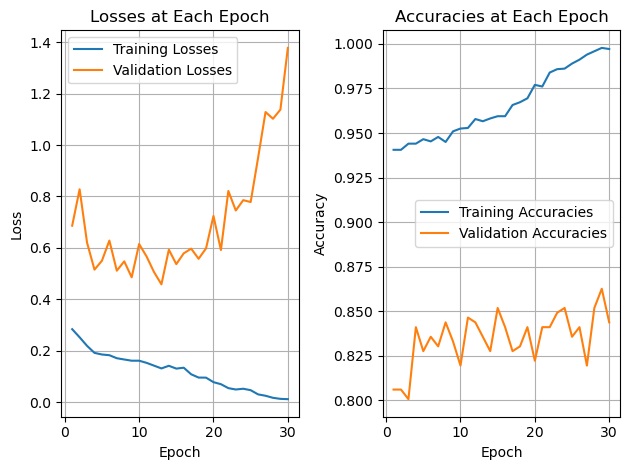

In [12]:
# TODO

# losses
plt.subplot(1,2,1)
plt.plot(np.arange(1,31,1), hist.history.get('loss'), label="Training Losses")
plt.plot(np.arange(1,31,1), hist.history.get('val_loss'), label="Validation Losses")
plt.grid(visible=True)
plt.title("Losses at Each Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

# accuracies
plt.subplot(1,2,2)
plt.plot(np.arange(1,31,1), hist.history.get('accuracy'), label="Training Accuracies")
plt.plot(np.arange(1,31,1), hist.history.get('val_accuracy'), label="Validation Accuracies")
plt.grid(visible=True)
plt.title("Accuracies at Each Epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()

# show plots
plt.tight_layout()
plt.show()